In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
from datetime import datetime

In [3]:
df1 = pd.read_csv('cleaned_forest_data.csv')
df2 = pd.read_csv('cleaned_grassland_data.csv')
df = pd.read_csv('cleaned_combined_data.csv')

In [ ]:
# Temporal analysis --> Forest

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [23]:
df['Temperature'] = df['Temperature'].astype(int).round()

In [24]:
df['Humidity'] = df['Humidity'].astype(int).round()

In [14]:
df['month'] = df['Date'].dt.month_name()

In [29]:
seasonal_df = df.groupby(['Location_Type','month'])['Initial_Three_Min_Cnt'].sum().reset_index(name = 'count')

In [30]:
seasonal_df

,Location_Type,month,count
0,Forest,July,1213
1,Forest,June,2213
2,Forest,May,1234
3,Grassland,July,1025
4,Grassland,June,1011
5,Grassland,May,1071


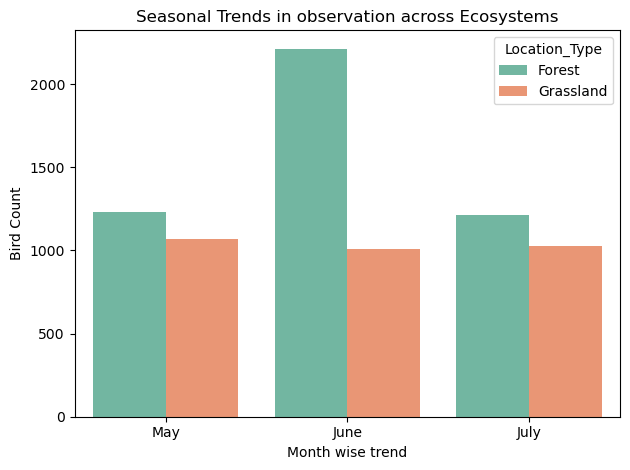

In [34]:
month_order = ['May','June','July']
sns.barplot(
    data = seasonal_df,
    x = 'month',
    y = 'count',
    hue = 'Location_Type',
    order = month_order,
    errorbar = None,
    palette = 'Set2'
)

plt.title('Seasonal Trends in observation across Ecosystems')
plt.xlabel('Month wise trend')
plt.ylabel('Bird Count')
plt.tight_layout()
plt.show()

In [76]:
bird_month_df = df.groupby(['Location_Type','month','Common_Name'])['Initial_Three_Min_Cnt'].sum().reset_index(name= 'count')

In [83]:
bird_month_df = bird_month_df[bird_month_df['count']>50].reset_index(drop=True)

In [84]:
bird_month_df

,Location_Type,month,Common_Name,count
0,Forest,July,Acadian Flycatcher,97
1,Forest,July,American Robin,52
2,Forest,July,Carolina Wren,89
3,Forest,July,Eastern Tufted Titmouse,84
4,Forest,July,Eastern Wood-Pewee,79
5,Forest,July,Northern Cardinal,66
6,Forest,July,Red-eyed Vireo,160
7,Forest,July,Wood Thrush,63
8,Forest,June,Acadian Flycatcher,139
9,Forest,June,American Robin,81


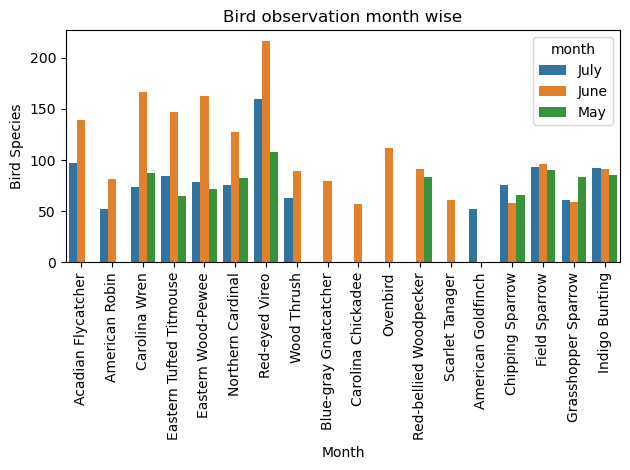

In [93]:
sns.barplot(data = bird_month_df,
            x ='Common_Name',
            y ='count',
            hue ='month',
            errorbar= None
           )
plt.title('Bird observation month wise')
plt.xlabel('Month')
plt.ylabel('Bird Species')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [47]:
df['Start_Time'] = pd.to_datetime("2025-06-10 " + df['Start_Time'].astype(str))

In [48]:
df['Start_Time'].dtype

dtype('<M8[ns]')

In [54]:
df['Start_Hour'] = df['Start_Time'].dt.hour

In [55]:
df['Start_Hour'].head()

0    6
1    6
2    6
3    6
4    6
Name: Start_Hour, dtype: int32

In [58]:
time_df = df.groupby(['Location_Type','Start_Hour'])['Initial_Three_Min_Cnt'].sum().reset_index(name= 'count')

In [59]:
time_df.head()

,Location_Type,Start_Hour,count
0,Forest,5,344
1,Forest,6,1258
2,Forest,7,1291
3,Forest,8,1004
4,Forest,9,550


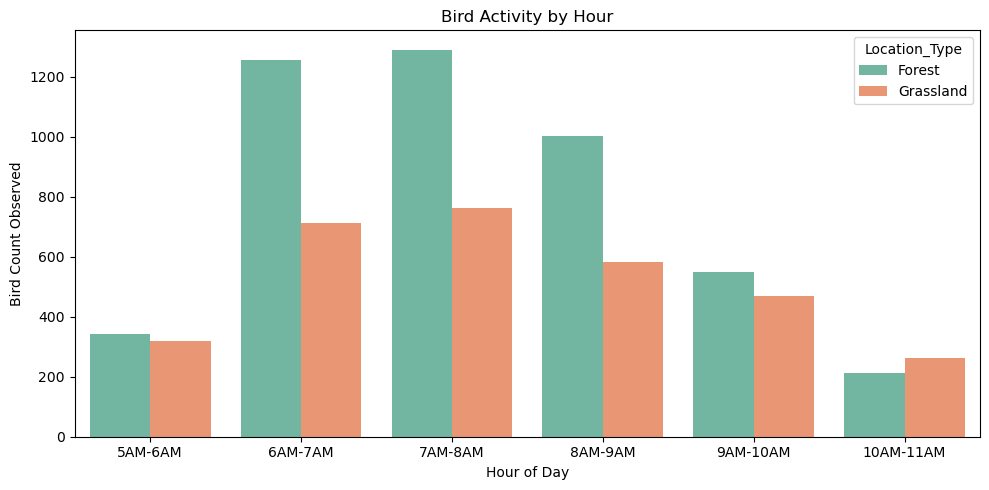

In [65]:
a = ['5AM-6AM','6AM-7AM','7AM-8AM','8AM-9AM','9AM-10AM','10AM-11AM']
plt.figure(figsize=(10, 5))
sns.barplot(data=time_df, x='Start_Hour', y='count',hue ='Location_Type', palette='Set2')
plt.title("Bird Activity by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Bird Count Observed")
plt.xticks(ticks = range(len(a)), labels=a)
plt.tight_layout()
plt.show()

In [66]:
df['Half_hour'] = df['Start_Time'].dt.floor('30min').dt.time

In [67]:
half_time_df = df.groupby(['Location_Type','Half_hour'])['Initial_Three_Min_Cnt'].sum().reset_index(name= 'count')

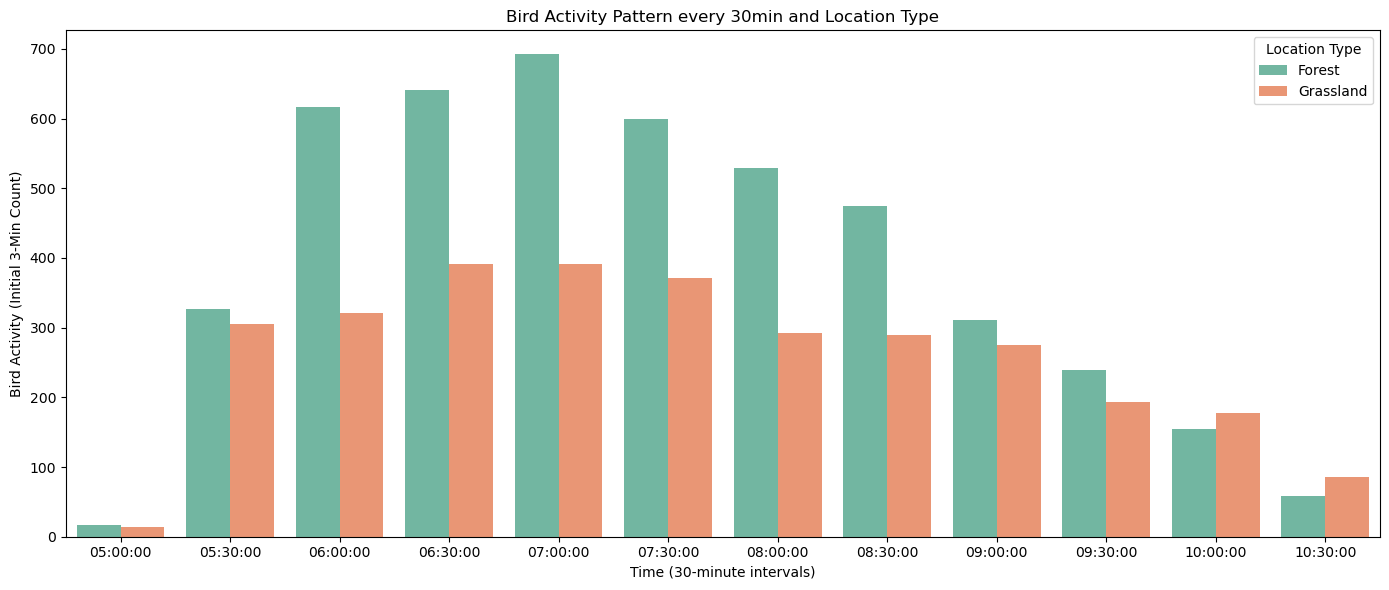

In [69]:
plt.figure(figsize=(14, 6))
sns.barplot(
    data= half_time_df,
    x='Half_hour',
    y='count',
    hue='Location_Type',
    palette='Set2'
)

plt.xticks()
plt.xlabel('Time (30-minute intervals)')
plt.ylabel('Bird Activity (Initial 3-Min Count)')
plt.title('Bird Activity Pattern every 30min and Location Type')
plt.legend(title='Location Type')
plt.tight_layout()
plt.show()